# About The Data
We'll be using the Breast Cancer Wisconsin (Diagnostic) Data Set from kaggle for this lab, but feel free to follow along with your own dataset. The dataset contains a total of 32 columns, with following attribute information:

1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

Our goal will be to predict the diagnosis (benign or malignant).

In [1]:
# Importing numpy, pandas, matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing rcParams
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
# Load the data into a pandas DataFrame
# call .head() to see first 5 of the dataset
breast_cancer_df = pd.read_csv('data.csv')
breast_cancer_df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
# My practical code
# call .tail() to return last 5 of the dataset
breast_cancer_df.tail()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424         M        21.56         22.39          142.00     1479.0   
565  926682         M        20.13         28.25          131.20     1261.0   
566  926954         M        16.60         28.08          108.30      858.1   
567  927241         M        20.60         29.33          140.10     1265.0   
568   92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
564                  0.07115          NaN  
565                  0.06637          NaN  
566                  0.07820          NaN  
567                  0.12400          NaN  
568                  0.07039          NaN  

[5 rows x 33 columns]

In [5]:
# Example code from pdf
# Drop column 'Unnamed: 32' and 'id'
breast_cancer_df.drop(labels = ['Unnamed: 32', 'id'], axis = 1, inplace = True)

In [6]:
# Example code from pdf
# call .info() to see if the columns are dropped and see any missing values 
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [7]:
# My practical code
# Another way to see any missing values
breast_cancer_df.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

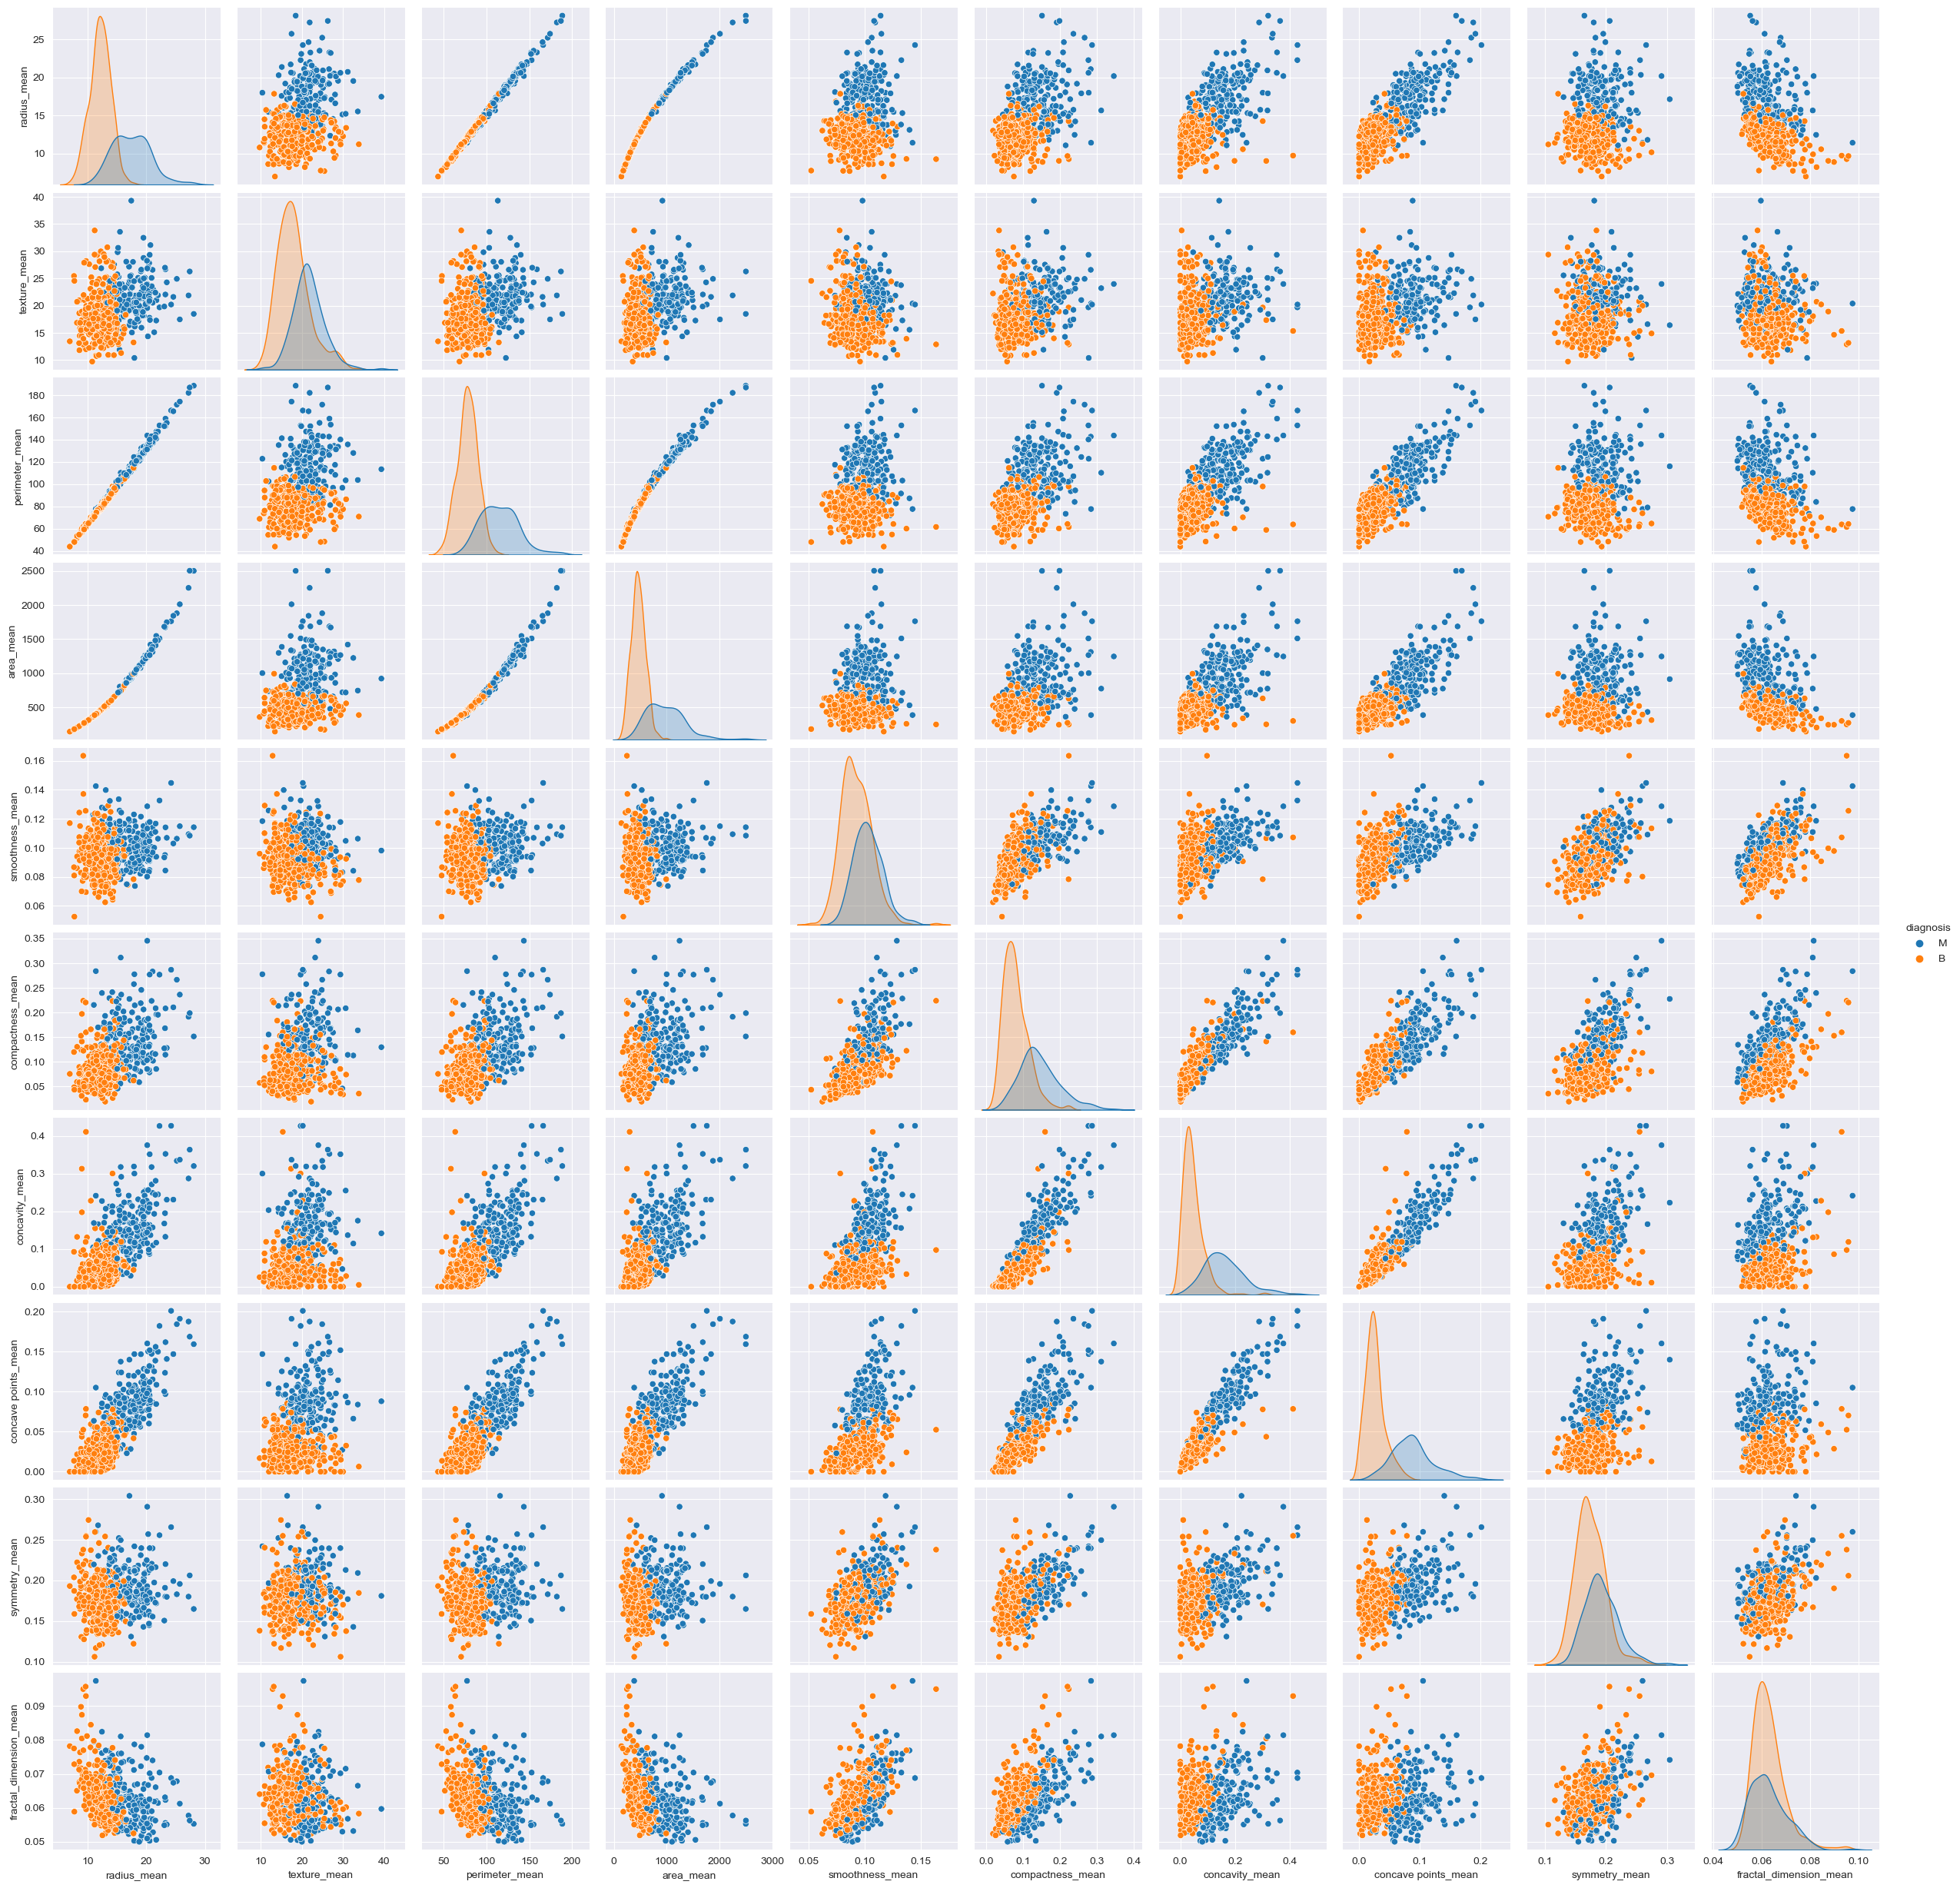

In [8]:
# Example code from pdf
# Plot all columns by using pairpolot 
sns.pairplot(breast_cancer_df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.show()

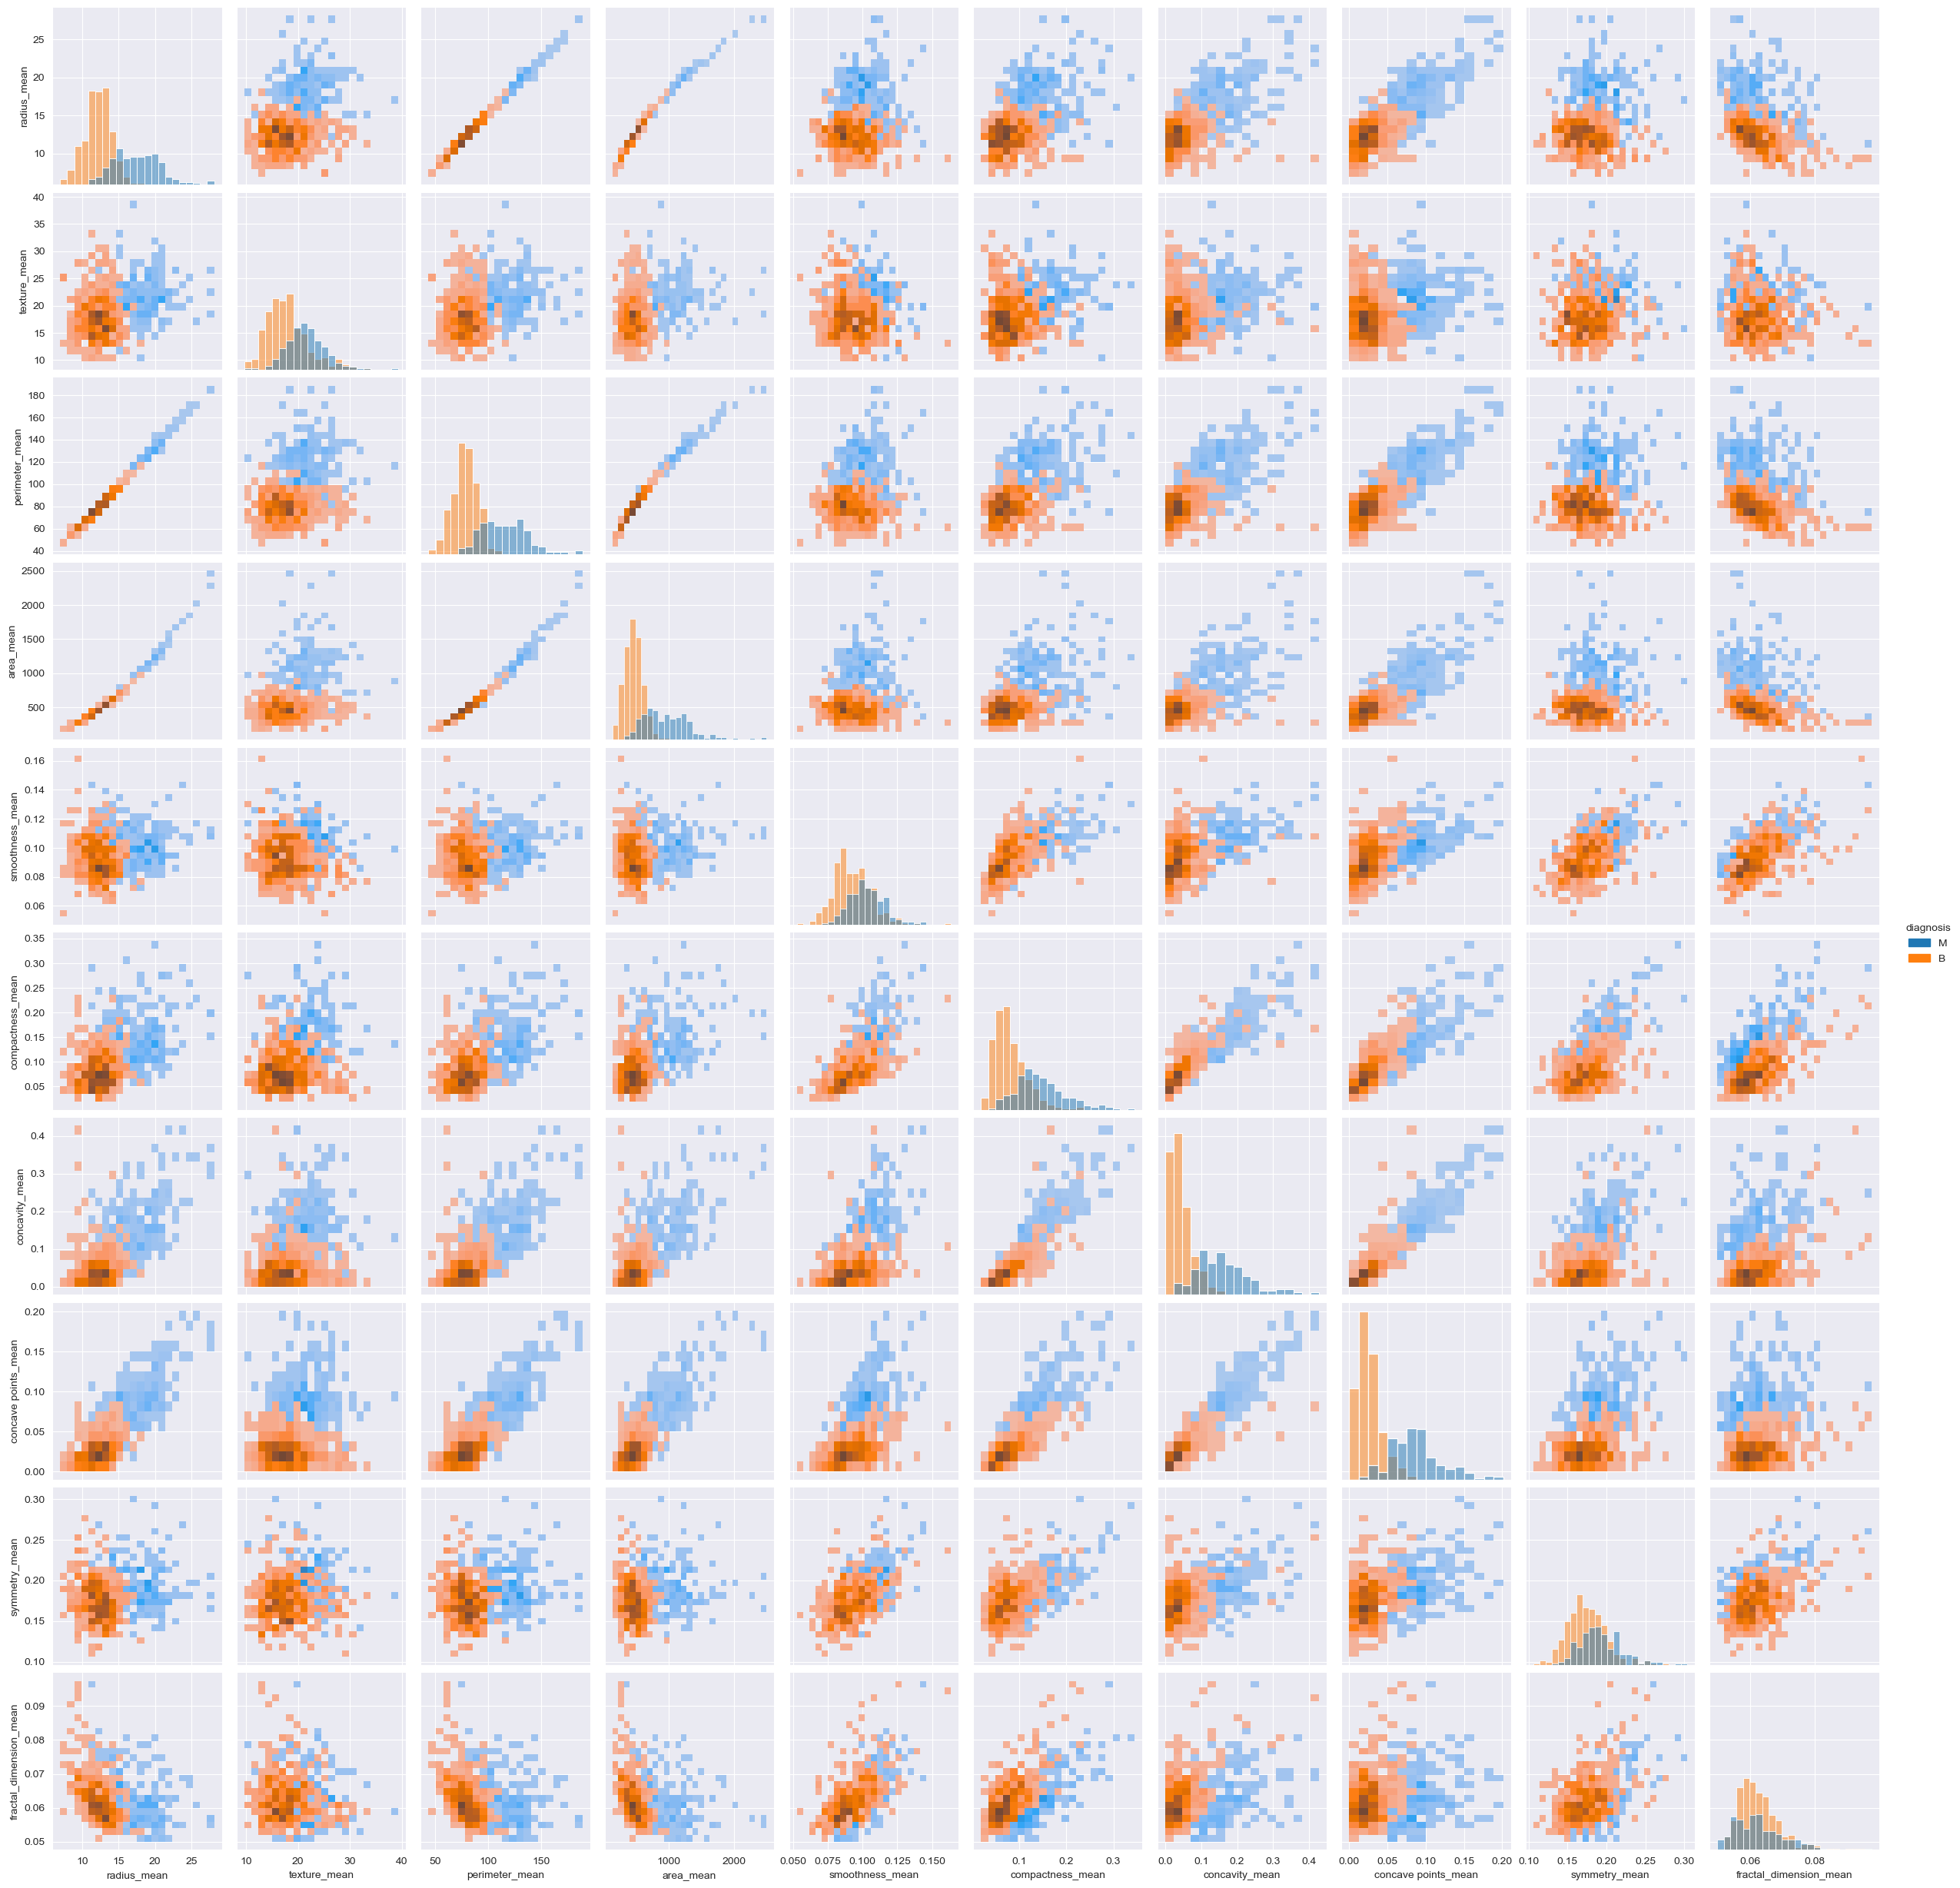

In [9]:
# My practical code 
# Kind = 'hist'
sns.pairplot(breast_cancer_df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                                     'smoothness_mean', 'compactness_mean', 'concavity_mean',
                                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'], kind = 'hist')
plt.show()

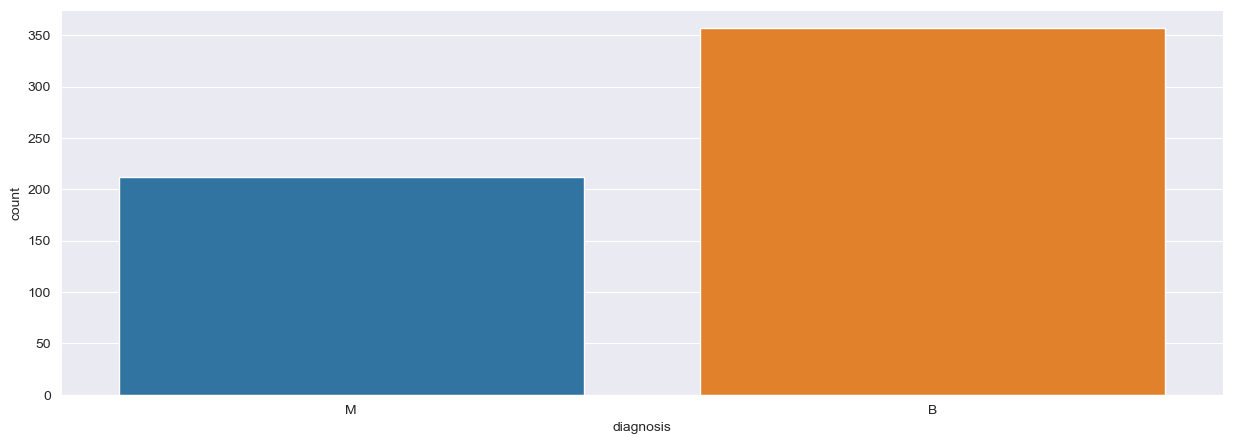

In [10]:
# Example code from pdf
# Plot a countplot for 'diagnosis' column
sns.countplot(x = breast_cancer_df['diagnosis'])
plt.show()

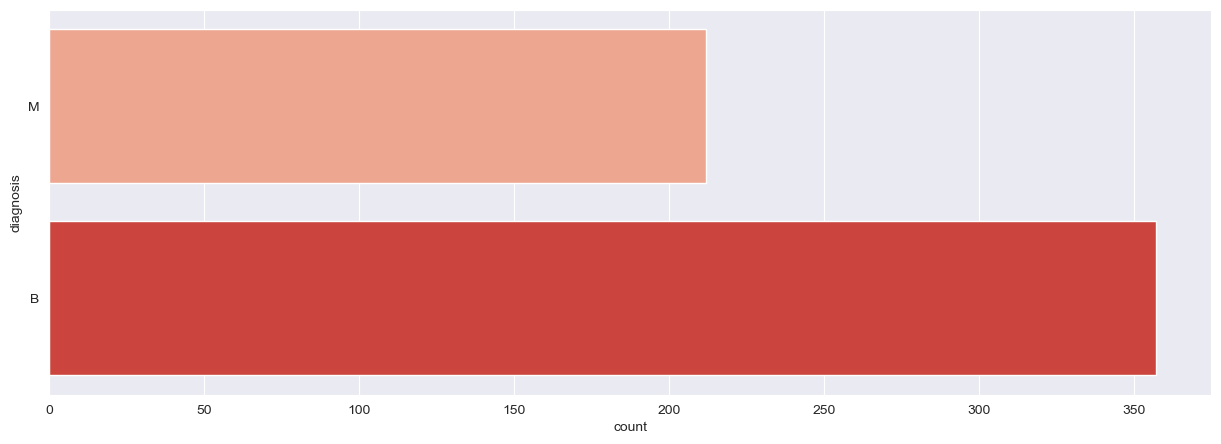

In [11]:
# My practical code
# Flip to horizontal and palette = Reds
sns.countplot(y = breast_cancer_df['diagnosis'], palette = "Reds")
plt.show()

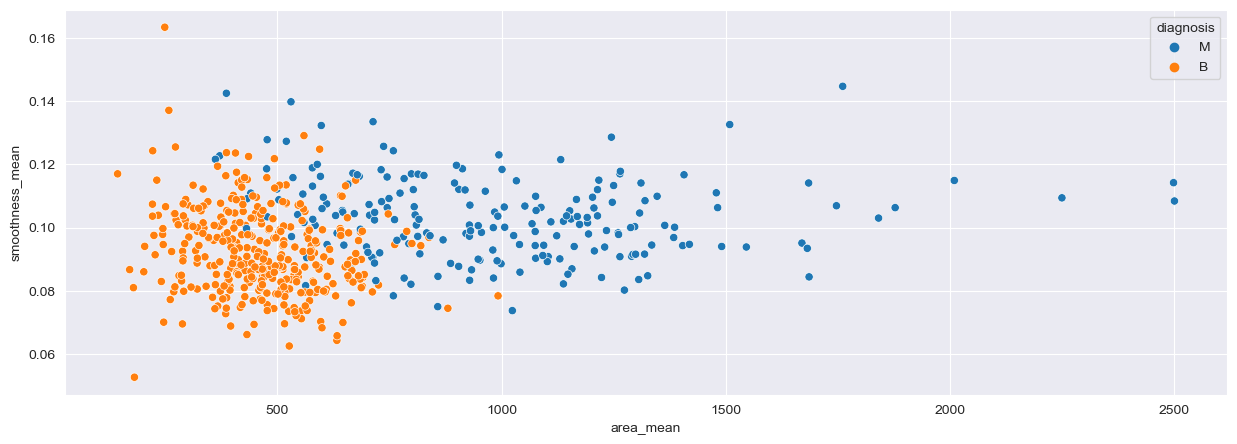

In [12]:
# Example code from pdf
# Plot a scatterplot of area_mean vs. smoothness_mean with hue = diagnosis
sns.scatterplot(x = 'area_mean', y = 'smoothness_mean', hue = 'diagnosis', data = breast_cancer_df)
plt.show()

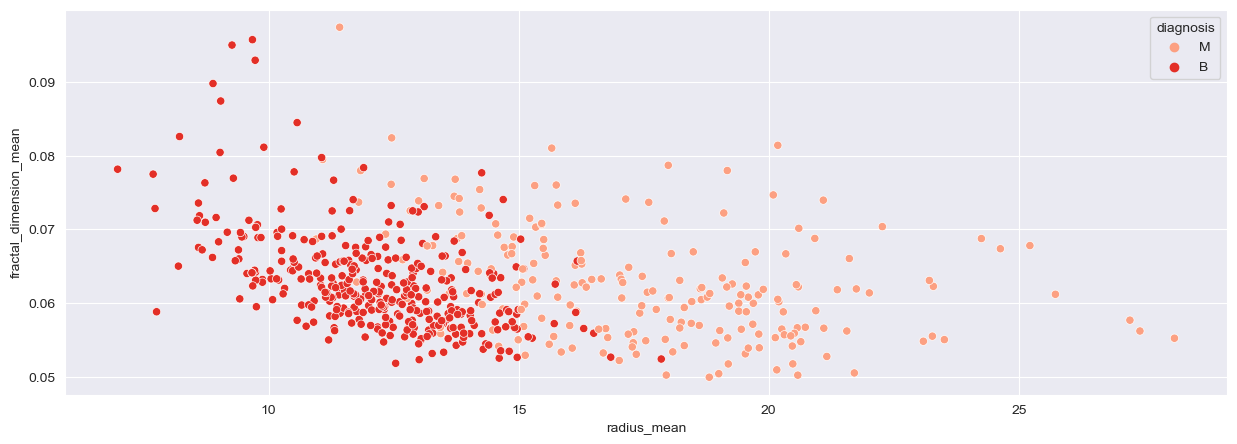

In [13]:
# My practical code
# Plot a scatterplot of radius_mean vs. fractal_dimension_mean with hue = diagnosis
# palette = Reds
sns.scatterplot(x = 'radius_mean', y = 'fractal_dimension_mean', hue = 'diagnosis', data = breast_cancer_df, palette = "Reds")
plt.show()

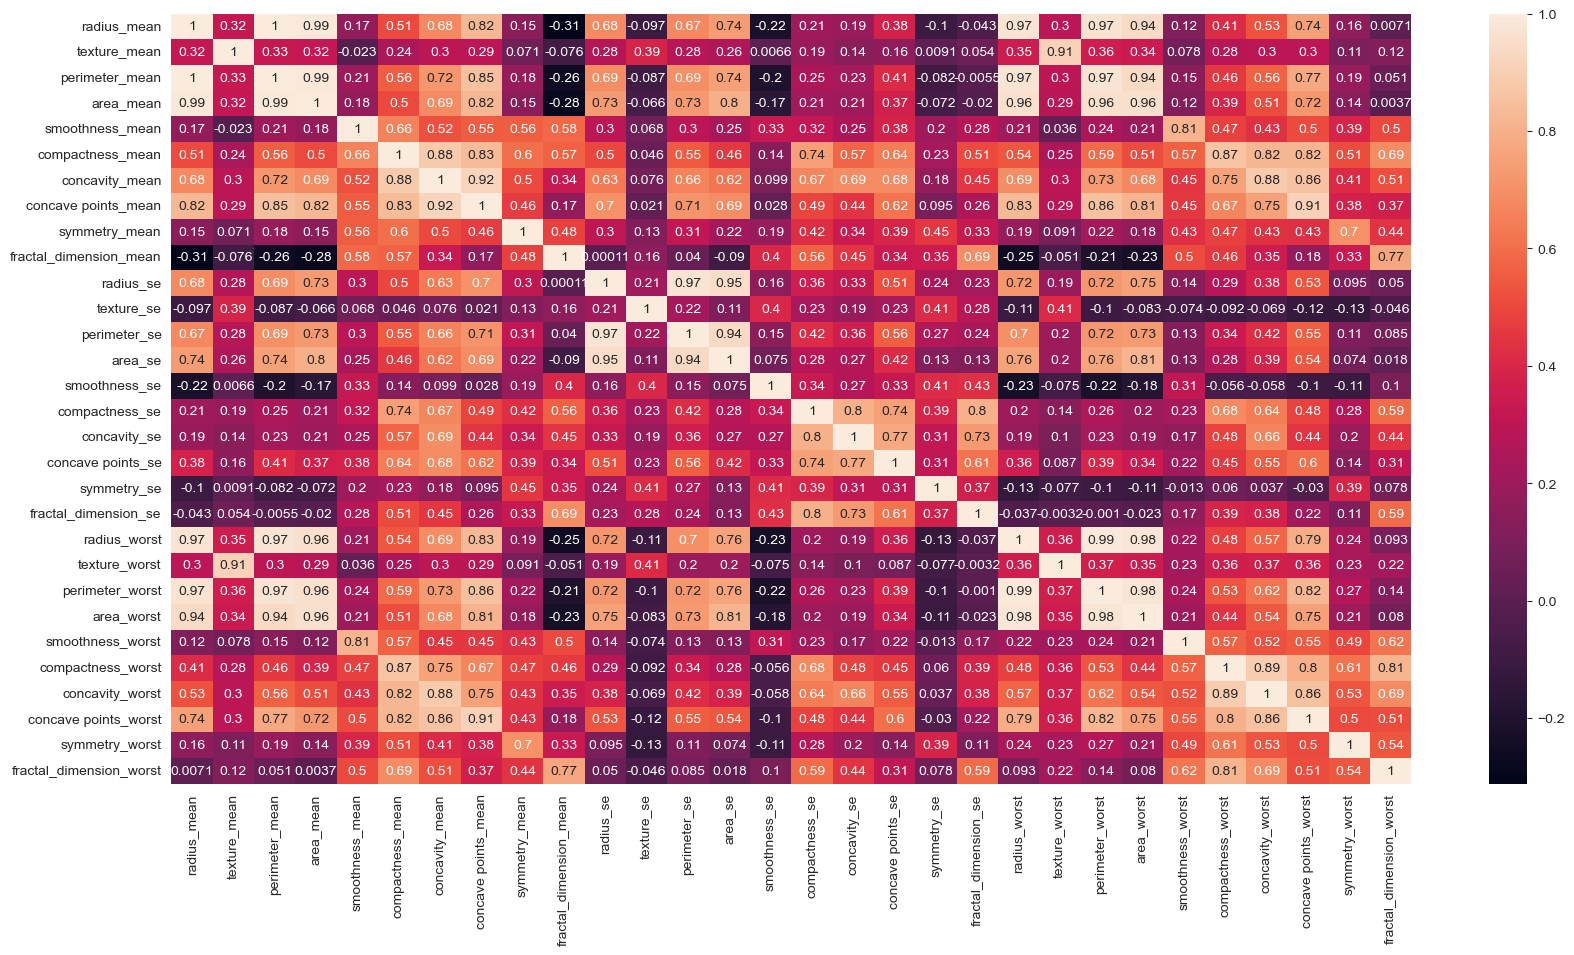

In [14]:
# Example code from pdf
# Create a correlation matrix by using a heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(breast_cancer_df.corr(), annot = True)
plt.show()

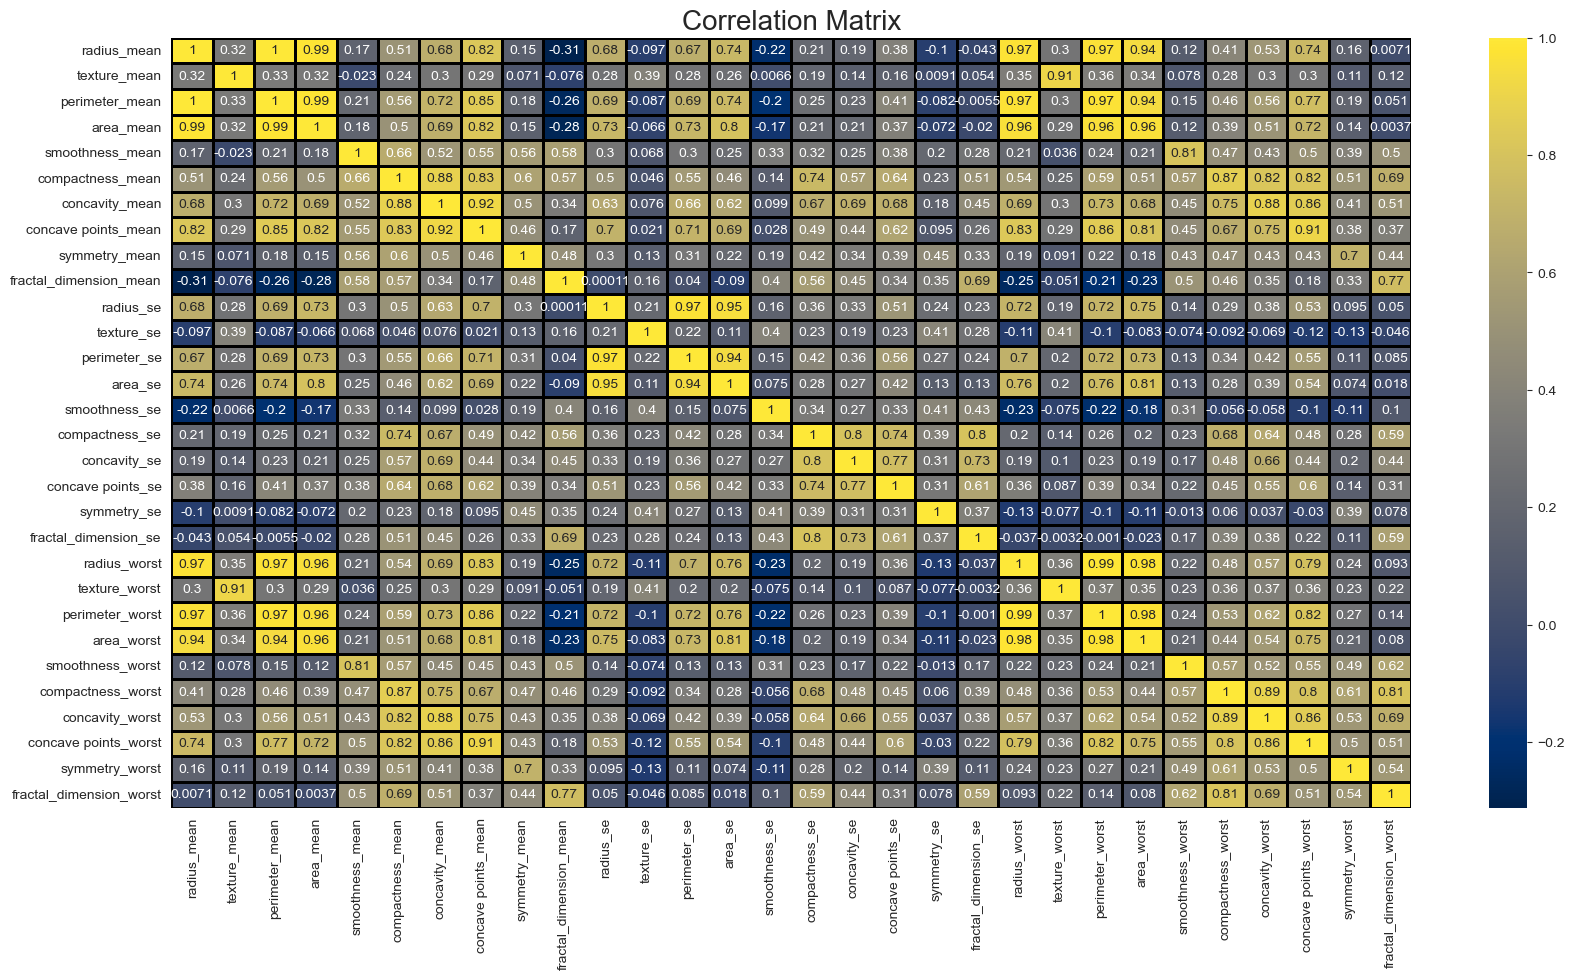

In [15]:
# My practical code
# Modify the heatmap
plt.figure(figsize = (20, 10))
sns.heatmap(breast_cancer_df.corr(), annot = True, cmap = "cividis", linewidths = 2, linecolor = "black")
plt.title('Correlation Matrix', fontsize = 20)
plt.show()

# Pre-Processing
Let's go ahead and scale our data before training and creating our model

In [16]:
# Example code from pdf
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

# all columns except 'Outcome'
X = breast_cancer_df.drop('diagnosis', axis = 1)
y = breast_cancer_df['diagnosis']

# create our scaler object
scaler = StandardScaler()
# use our scaler object to transform/scale our data and save it into X_scaled
X_scaled = scaler.fit_transform(X)
# reassign X to a new DataFrame using the X_scaled values.
X = pd.DataFrame(data = X_scaled, columns = X.columns)

In [17]:
# Example code from pdf
# Call .head() to return first 5 data 
X.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                2.255747  ...      1.886690      -1.359293         2.303601   
1               -0.868652  ...      1.805927      -0.369203         1.535126   
2               -0.398008  ...      1.511870      -0.023974         1.347475   
3                4.910919  ...     -0.281464       0.133984        -0.249939   
4               -0.562450  ...      1.298575      -1.466770         1.338539   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0    2.001237          1.307686           2.616665         2.109526   
1    1.890489         -0.375612          -0.430444        -0.146749   
2    1.456285          0.527407           1.082932         0.854974   
3   -0.550021          3.394275           3.893397         1.989588   
4    1.220724          0.220556          -0.313395         0.613179   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0              2.296076        2.750622                 1.937015  
1              1.087084       -0.243890                 0.281190  
2              1.955000        1.152255                 0.201391  
3              2.175786        6.046041                 4.935010  
4              0.729259       -0.868353                -0.397100  

[5 rows x 30 columns]

In [18]:
# My practical code
# Call .tail() to return last 5 data 
X.tail()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     fractal_dimension_mean  ...  radius_worst  texture_worst  \
564               -0.931027  ...      1.901185       0.117700   
565               -1.058611  ...      1.536720       2.047399   
566               -0.895587  ...      0.561361       1.374854   
567                1.043695  ...      1.961239       2.237926   
568               -0.561032  ...     -1.410893       0.764190   

     perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
564         1.752563    2.015301          0.378365          -0.273318   
565         1.421940    1.494959         -0.691230          -0.394820   
566         0.579001    0.427906         -0.809587           0.350735   
567         2.303601    1.653171          1.430427           3.904848   
568        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
564         0.664512              1.629151       -1.360158   
565         0.236573              0.733827       -0.531855   
566         0.326767              0.414069       -1.104549   
567         3.197605              2.289985        1.919083   
568        -1.305831             -1.745063       -0.048138   

     fractal_dimension_worst  
564                -0.709091  
565                -0.973978  
566                -0.318409  
567                 2.219635  
568                -0.751207  

[5 rows x 30 columns]

# Creating our Model

In [19]:
# Example code from pdf
# Importing train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [20]:
# My practical code
# Try test size = 20%
# Set random_state to 102
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 102)

In [21]:
# Example code from pdf
# Importing SVC
from sklearn.svm import SVC

# instantiate the model with default parameters
model = SVC()
# fit/train
model.fit(X_train, y_train)

SVC()

In [22]:
# My practical code
# with 20% test size

# instantiate the model with default parameters
model2 = SVC()
# fit/train
model2.fit(X2_train, y2_train)

SVC()

# Model Evaluation

In [23]:
# Example code from pdf
# Prediction off of the X_test
predictions = model.predict(X_test)

In [24]:
# My practical code
# with 20% test size
# Prediction off of the X2_test
predictions2 = model2.predict(X2_test)

In [25]:
# Example code from pdf
# Importing confusion matrix
# Print the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0, 0])
print('\nTrue Negatives(TN) = ', cm[1, 1])
print('\nFalse Positives(FP) = ', cm[0, 1])
print('\nFalse Negatives(FN) = ', cm[1, 0])

Confusion matrix

 [[104   1]
 [  3  63]]

True Positives(TP) =  104

True Negatives(TN) =  63

False Positives(FP) =  1

False Negatives(FN) =  3


In [26]:
# My practical code
# with 20% test size
# Print the confusion matrix

cm2 = confusion_matrix(y2_test, predictions2)

print('Confusion matrix\n\n', cm2)
print('\nTrue Positives(TP) = ', cm2[0, 0])
print('\nTrue Negatives(TN) = ', cm2[1, 1])
print('\nFalse Positives(FP) = ', cm2[0, 1])
print('\nFalse Negatives(FN) = ', cm2[1, 0])

Confusion matrix

 [[73  2]
 [ 2 37]]

True Positives(TP) =  73

True Negatives(TN) =  37

False Positives(FP) =  2

False Negatives(FN) =  2


In [27]:
# Example code from pdf
# Importing classification report
# Print the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           B       0.97      0.99      0.98       105
           M       0.98      0.95      0.97        66

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171



In [28]:
# My practical code
# with 20% test size
# Print the classification report

print(classification_report(y2_test, predictions2))

              precision    recall  f1-score   support

           B       0.97      0.97      0.97        75
           M       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



# Hyperparameter Tuning
Finding the right parameters (like what C or gamma values to use) is a tricky task, but luckily we can be a little lazy and just try a bunch of combinations and see what works best. This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV. The CV stands for cross-validation.

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. Let's go ahead and try a few different parameters to see which of them is the best set to use.

In [29]:
# Example code from pdf
# Create a parameter grid
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [30]:
# Example code from pdf
# Importing GridSearchCV
# Create GridSearchCV and refit = True and versbose = 3
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [31]:
# My practical code
# Create GridSearchCV and refit = True and versbose = 5
grid2 = GridSearchCV(SVC(), param_grid, refit = True, verbose = 5)

In [32]:
# Example code from pdf
# Fitting X_train and y_train in grid
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.637 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.912 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.987 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.950 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.937 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.975 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.975 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.963 total time=   0.0s
[CV 3/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [33]:
# My practical code
# Fitting X2_train and y2_train in grid2
grid2.fit(X2_train, y2_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.626 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.615 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.934 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.901 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.923 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.945 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.956 total time=   0.0s
[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.945 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.967 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.978 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.967 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.967 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/5] END ..C=1000, gamma

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=5)

In [34]:
# Example code from pdf
# Inspect the best parameter found by GridSearchCV using best_params
grid.best_params_

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [35]:
# My practical code
# Inspect the best parameter found by GridSearchCV
# using best_params for grid2
grid2.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [36]:
# My practical code
# Lets inspect the best estimator using the best_estimator_
grid.best_estimator_

SVC(C=10, gamma=0.01)

In [37]:
# Example code from pdf
# Re-run predictions on this grid
grid_predictions = grid.predict(X_test)

In [38]:
# My practical code
# with 20% test size
# Re-run predictions on this grid
grid_predictions2 = grid2.predict(X2_test)

In [39]:
# Example code from pdf
# Print the confusion matrix and classifiaction report
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[105   0]
 [  2  64]]
              precision    recall  f1-score   support

           B       0.98      1.00      0.99       105
           M       1.00      0.97      0.98        66

    accuracy                           0.99       171
   macro avg       0.99      0.98      0.99       171
weighted avg       0.99      0.99      0.99       171



In [40]:
# My practical code
# with 20% test size
# Print the confusion matrix and classifiaction report
print(confusion_matrix(y2_test, grid_predictions2))
print(classification_report(y2_test, grid_predictions2))

[[74  1]
 [ 2 37]]
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        75
           M       0.97      0.95      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

